<a href="https://colab.research.google.com/github/PHSX-bond/218-PHSX-_25/blob/main/Interference_and_Diffraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

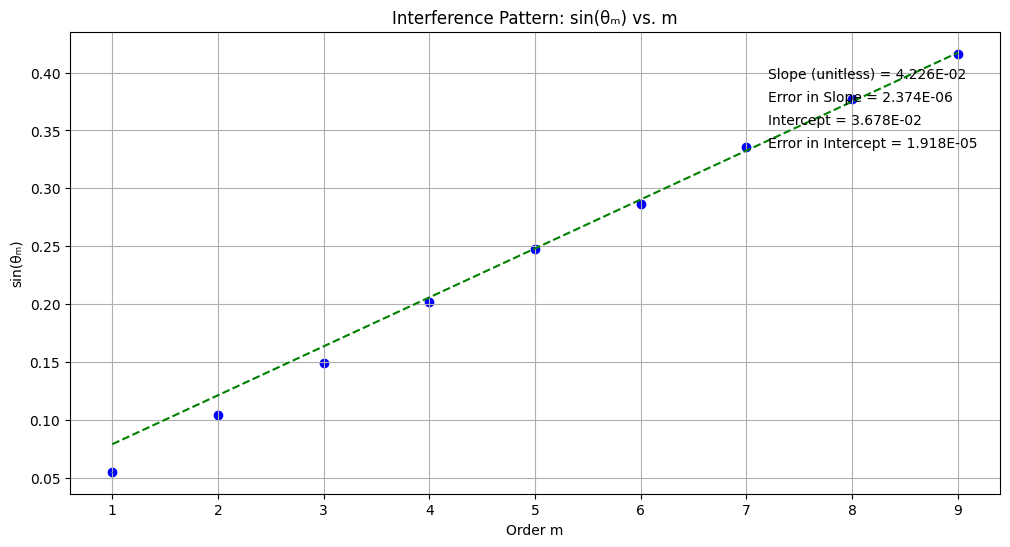

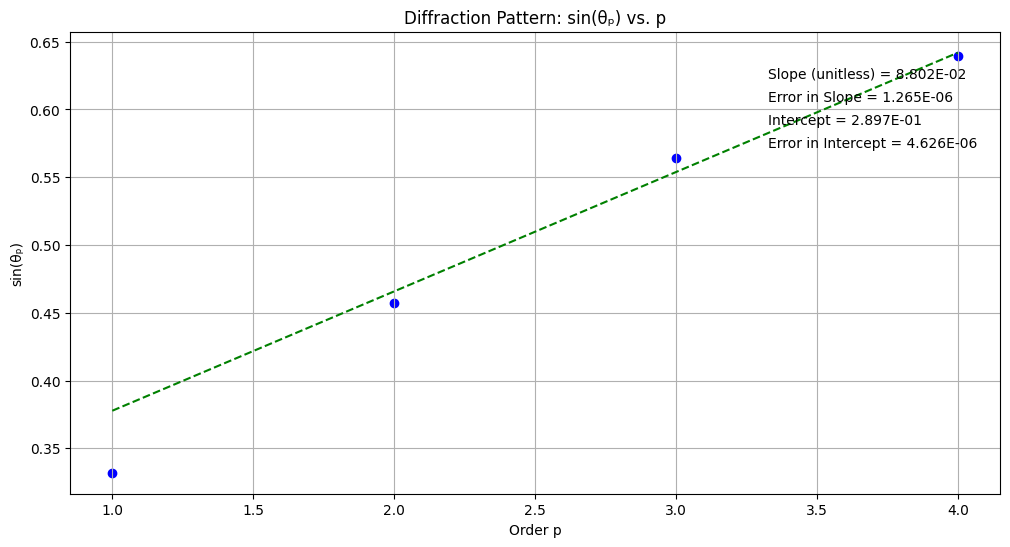

In [6]:
# PHSX 216 & 218 Interference and Diffraction Pattern Plots
# Brianna Beller (edited for sinθ vs m and p)
# Updated May 2025

import numpy as np
import matplotlib.pyplot as plt

# ------------------------ Interference Pattern ------------------------

# Data for Interference: sin(θₘ) vs m
m = np.array([1,2,3,4,5,6,7,8,9])
sin_theta_m = np.array([0.05477479, 0.10456645, 0.14916930, 0.20149499, 0.24800241,
                        0.28684563, 0.33585900, 0.37685971, 0.41575976])
err_theta_m = np.array([3.704591e-04, 1.001555e-04, 4.778570e-05, 2.503456e-05,
                        1.574589e-05, 1.123706e-05, 7.666723e-06, 5.712760e-06,
                        4.384739e-06])

# Assign variables
x = m
y = sin_theta_m
dy = err_theta_m

# Plot Labels
plot_title = 'Interference Pattern: sin(θₘ) vs. m'
x_label = 'Order m'
y_label = 'sin(θₘ)'
slope_units = 'unitless'
annotation_placement = 3

# Linear Fit
b, m_fit = np.polynomial.polynomial.polyfit(x, y, 1, w=1/dy)
fit = b + m_fit * x

def Delta(x, dy):
    D = (sum(1/dy**2))*(sum(x**2/dy**2))-(sum(x/dy**2))**2
    return D

D = Delta(x, dy)
dm = np.sqrt(1/D*sum(1/dy**2))
db = np.sqrt(1/D*sum(x**2/dy**2))

def LLSFD2(x,y,dy):
    N = sum(((y-b-m_fit*x)/dy)**2)
    return N

N = LLSFD2(x, y, dy)

xpos = 0.75
ypos = [.9, .85, .8, .75]

plt.figure(figsize=(12, 6))
plt.plot(x, fit, color='green', linestyle='--')
plt.scatter(x, y, color='blue')
plt.errorbar(x, y, yerr=dy, fmt='none')
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.title(plot_title)

plt.annotate('Slope ({}) = {:.3E}'.format(slope_units, m_fit), (xpos, ypos[0]), xycoords='axes fraction')
plt.annotate('Error in Slope = {:.3E}'.format(dm), (xpos, ypos[1]), xycoords='axes fraction')
plt.annotate('Intercept = {:.3E}'.format(b), (xpos, ypos[2]), xycoords='axes fraction')
plt.annotate('Error in Intercept = {:.3E}'.format(db), (xpos, ypos[3]), xycoords='axes fraction')

plt.grid(True)
plt.show()

# ------------------------ Diffraction Pattern ------------------------

# Data for Diffraction: sin(θₚ) vs p
p = np.array([1, 2, 3, 4])
sin_theta_p = np.array([0.3320306, 0.4573480, 0.5642441, 0.6395793])
err_theta_p = np.array([7.888413e-06, 3.337827e-06, 1.676431e-06, 1.003890e-06])

x = p
y = sin_theta_p
dy = err_theta_p

# Labels
plot_title = 'Diffraction Pattern: sin(θₚ) vs. p'
x_label = 'Order p'
y_label = 'sin(θₚ)'
slope_units = 'unitless'
annotation_placement = 3

# Fit
b, m_fit = np.polynomial.polynomial.polyfit(x, y, 1, w=1/dy)
fit = b + m_fit * x

D = Delta(x, dy)
dm = np.sqrt(1/D*sum(1/dy**2))
db = np.sqrt(1/D*sum(x**2/dy**2))
N = LLSFD2(x, y, dy)

xpos = 0.75
ypos = [.9, .85, .8, .75]

plt.figure(figsize=(12, 6))
plt.plot(x, fit, color='green', linestyle='--')
plt.scatter(x, y, color='blue')
plt.errorbar(x, y, yerr=dy, fmt='none')
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.title(plot_title)

plt.annotate('Slope ({}) = {:.3E}'.format(slope_units, m_fit), (xpos, ypos[0]), xycoords='axes fraction')
plt.annotate('Error in Slope = {:.3E}'.format(dm), (xpos, ypos[1]), xycoords='axes fraction')
plt.annotate('Intercept = {:.3E}'.format(b), (xpos, ypos[2]), xycoords='axes fraction')
plt.annotate('Error in Intercept = {:.3E}'.format(db), (xpos, ypos[3]), xycoords='axes fraction')

plt.grid(True)
plt.show()
